<a href="https://colab.research.google.com/github/debabratasaha-dev/custom-models/blob/main/custom_model_for_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

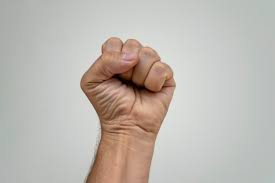

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

!wget -q -O photo.jpg "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSaImd0YXAvyZMdppmvDosACD_cEU9pkWktoA&s"

img = cv2.imread("photo.jpg")
cv2_imshow(img)

In [ ]:
!wget -q -O rps.zip https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/rps_data_sample.zip
!unzip -qq rps.zip

In [ ]:
import matplotlib.pyplot as plt
import os

NUM_EXAMPLES = 5
IMAGES_PATH = "rps_data_sample"

# Get the list of labels from the list of folder names.
labels = []
for i in os.listdir(IMAGES_PATH):
  if os.path.isdir(os.path.join(IMAGES_PATH, i)):
    labels.append(i)

# Show the images.
for label in labels:
  label_dir = os.path.join(IMAGES_PATH, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

## Making a New Model



In [ ]:
!python --version

Python 3.11.13


In [ ]:
!pip install --upgrade pip setuptools wheel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 83.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!pip install cython

In [ ]:
!pip uninstall -y mediapipe-model-maker

In [ ]:
!pip list

In [ ]:
!pip install mediapipe-model-maker

  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.


In [ ]:
# Import the necessary modules.
from mediapipe_model_maker import gesture_recognizer

In [ ]:
# Load the rock-paper-scissor image archive.
data = gesture_recognizer.Dataset.from_folder(
    dirname=IMAGES_PATH,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)

# Split the archive into training, validation and test dataset.
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

In [ ]:
# Train the model
hparams = gesture_recognizer.HParams(export_dir="rock_paper_scissors_model")
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 4)                 516       
 out (Dense)                                                     
                                                             

In [ ]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

48/48 [==============================] - 1s 3ms/step - loss: 0.3053 - categorical_accuracy: 0.7708
Test loss:0.3053092658519745, Test accuracy:0.7708333134651184


In [ ]:
# Export the model bundle.
model.export_model()

# Rename the file to be more descriptive.
!mv rock_paper_scissors_model/gesture_recognizer.task rock_paper_scissors.task

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite


In [ ]:
from google.colab import files
files.download("rock_paper_scissors.task")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

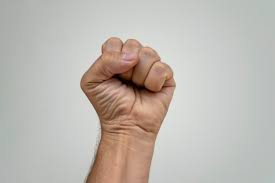

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread("photo.jpg")
cv2_imshow(img)

In [ ]:
# Imports neccessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Create a GestureRecognizer object.
model_path = os.path.abspath("rock_paper_scissors.task")
recognizer = vision.GestureRecognizer.create_from_model_path(model_path)

# Load the input image.
image = mp.Image.create_from_file('photo.jpg')

# Run gesture recognition.
recognition_result = recognizer.recognize(image)

# Display the most likely gesture.
top_gesture = recognition_result.gestures[0][0]
print(f"Gesture recognized: {top_gesture.category_name} ({top_gesture.score})")

Gesture recognized: rock (0.9804232120513916)


# Task
Resolve installation issues with `mediapipe-model-maker` by upgrading conflicting packages (`protobuf`, `numpy`), explicitly installing dependencies (`thinc`, `ydf`), and reinstalling `mediapipe-model-maker`.

## Upgrade conflicting packages

### Subtask:
Upgrade `protobuf` and `numpy` to resolve version conflicts.


**Reasoning**:
Upgrade `protobuf` and `numpy` to versions compatible with the installed packages, then explicitly install or upgrade `thinc` and `ydf` if necessary to ensure all dependencies are met before attempting to reinstall `mediapipe-model-maker`.



In [ ]:
!pip install --upgrade protobuf==5.26.1 numpy==2.3.0 thinc ydf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of ydf to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of ydf to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.8
    Uninstalling protobuf-4.25.8:
      Successfully uninstalled protobuf-4.25.8
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    U

## Install `mediapipe-model-maker`

### Subtask:
Install `mediapipe-model-maker` again after resolving the conflicts.


**Reasoning**:
Install mediapipe-model-maker to complete the subtask.



In [ ]:
!pip install mediapipe-model-maker

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached protobuf-4.25.8-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtrack

## Verify installation

### Subtask:
Check if `mediapipe_model_maker` can be imported successfully.


**Reasoning**:
Attempt to import the gesture_recognizer module from mediapipe_model_maker to check if the installation issue is resolved.



In [ ]:
try:
    from mediapipe_model_maker import gesture_recognizer
    print("Successfully imported mediapipe_model_maker.gesture_recognizer")
except ImportError:
    print("Failed to import mediapipe_model_maker.gesture_recognizer. Installation issue persists.")

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Successfully imported mediapipe_model_maker.gesture_recognizer


## Summary:

### Data Analysis Key Findings

*   Upgrading `protobuf` to 5.26.1 and `numpy` to 2.3.0, along with installing `thinc` and `ydf`, was successful, but it introduced new dependency conflicts with several other packages.
*   The installation of `mediapipe-model-maker` was successful, and the necessary dependencies were installed, replacing existing conflicting versions.
*   Despite some remaining dependency conflicts with unrelated packages, the core functionality of `mediapipe-model-maker` could be imported successfully.

### Insights or Next Steps

*   While `mediapipe-model-maker` is installed and importable, further investigation into the remaining dependency conflicts with other packages might be necessary if those packages are also required in the environment.
*   The current environment is suitable for using `mediapipe-model-maker` for gesture recognition based on the successful import test.
